In [1]:
print('hello') 

hello


In [1]:
import pandas as pd 
# from fbprophet import Prophet
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 

In [5]:
df = pd.read_csv('AirPassengers.csv') 
df.head() 

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.dtypes 

Month          object
#Passengers     int64
dtype: object

In [7]:
df['Month'] = pd.DatetimeIndex(df['Month']) 
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [8]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [9]:
df=df.set_index('Month')

In [10]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
df.dtypes

#Passengers    int64
dtype: object

In [12]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [13]:
y = df['#Passengers'].resample('MS').mean()

In [14]:
y.isnull().sum()

0

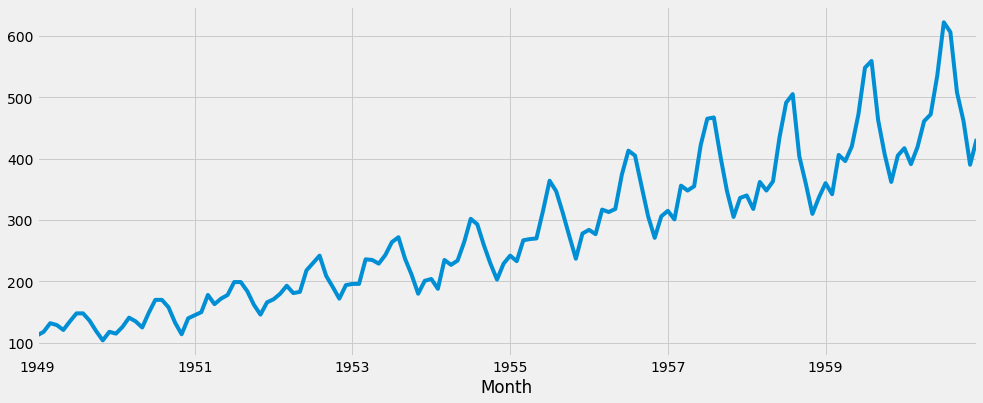

In [19]:
y.plot(figsize=(15,6))
plt.show()

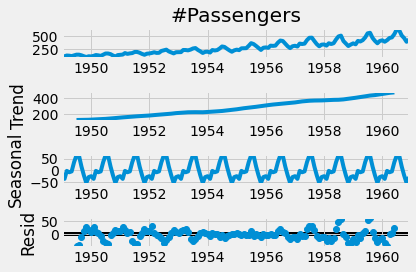

In [21]:
# decomposition
from pylab import rcParams
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

fig = decomposition.plot()
plt.show()

In [7]:
df =df.rename(columns={'Month':'ds', '#Passengers':'y'})
df.head()  

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


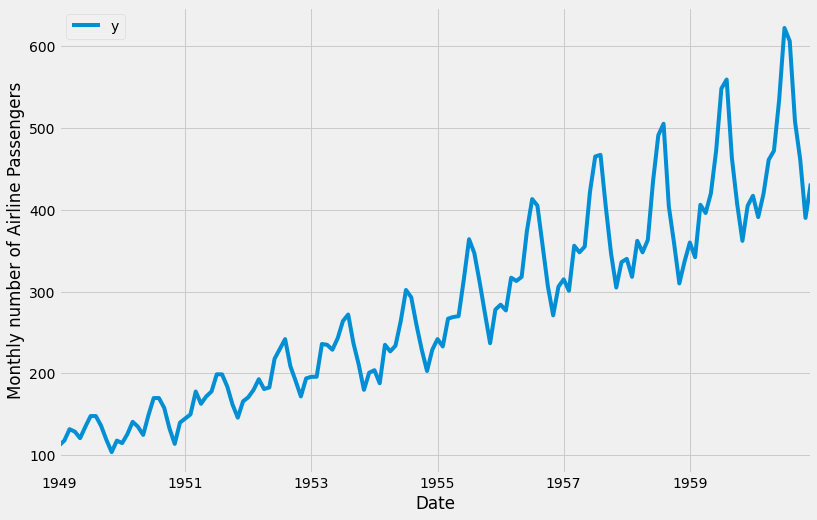

In [8]:
ax = df.set_index('ds').plot(figsize=(12,8)) 
ax.set_ylabel('Monthly number of Airline Passengers') 
ax.set_xlabel('Date') 

plt.show() 

In [2]:
import statsmodels.api as sm 

In [3]:
data = sm.datasets.co2.load_pandas() 
co2 = data.data 

In [4]:
co2.dtypes

co2    float64
dtype: object

In [12]:
print(co2.head()) 

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


In [13]:
co2.index 

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [14]:
co2['1990':] 

,co2
1990-01-06,353.4
1990-01-13,353.5
1990-01-20,353.8
1990-01-27,353.9
1990-02-03,354.1
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [15]:
y = co2['co2'].resample('MS').mean() 

In [16]:
y.head() 

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [17]:
y['1990':] 

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, Length: 144, dtype: float64

In [18]:
y['1990-01-01':'2000-01-01'] 

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
1999-09-01    364.675
1999-10-01    365.140
1999-11-01    366.650
1999-12-01    367.900
2000-01-01    369.020
Freq: MS, Name: co2, Length: 121, dtype: float64

In [19]:
y['1990-1-1':'2000-1-1']  

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
1999-09-01    364.675
1999-10-01    365.140
1999-11-01    366.650
1999-12-01    367.900
2000-01-01    369.020
Freq: MS, Name: co2, Length: 121, dtype: float64

In [23]:
import numpy as np

In [27]:
y.isnull().sum()

5

In [28]:
y=y.fillna(y.bfill()) 

In [29]:
y.isnull().sum() 

0

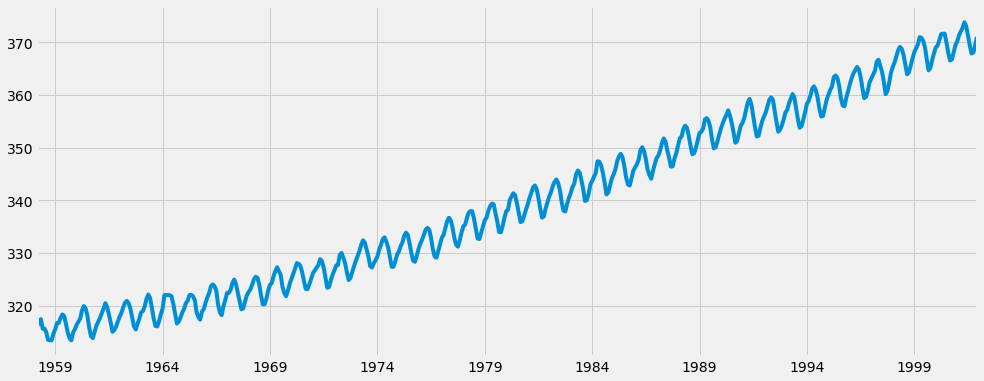

In [30]:
y.plot(figsize=(15,6)) 
plt.show() 

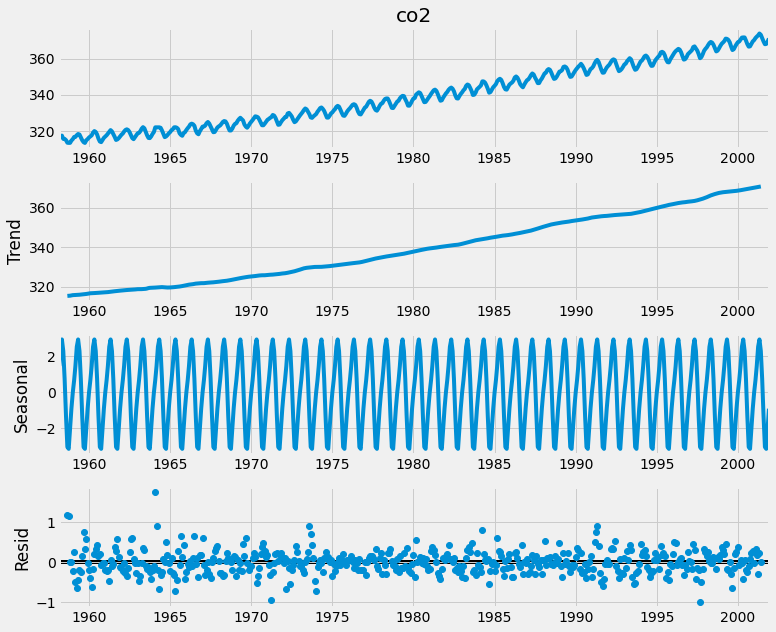

In [31]:
from pylab import rcParams 
rcParams['figure.figsize'] = 11, 9 
decomposition = sm.tsa.seasonal_decompose(y, model='additive') 
fig = decomposition.plot() 
plt.show() 

susnspot

In [32]:
data2 = sm.datasets.sunspots.load_pandas().data
data2.head() 

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [36]:
data2.index 

RangeIndex(start=0, stop=309, step=1)

In [37]:
data2.isnull().sum() 

YEAR           0
SUNACTIVITY    0
dtype: int64

Text(0, 0.5, 'Sun activty')

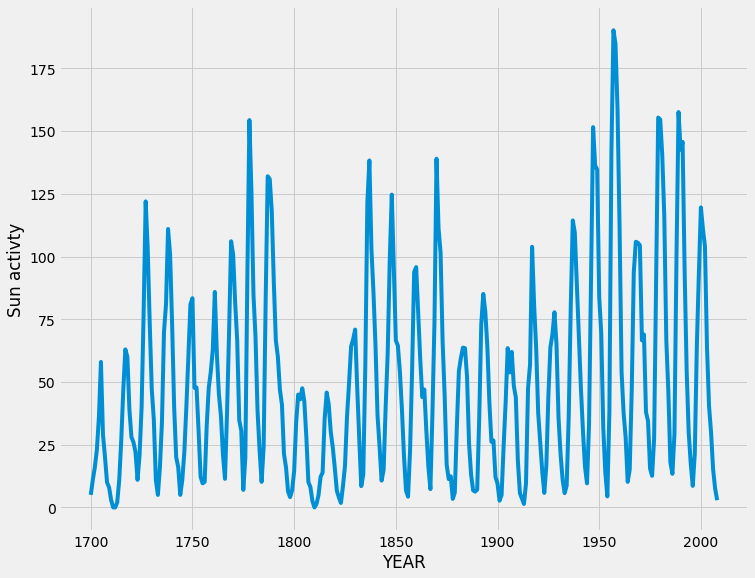

In [39]:
plt.plot(data2['YEAR'], data2['SUNACTIVITY']) 
plt.xlabel('YEAR')
plt.ylabel('Sun activty')

In [ ]:
# y = co2['co2'].resample('MS').mean()
Y = data2

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(data2, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None